In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_key_secret, 
                    access_token, 
                    access_token_secret)
consumer_secret = consumer_key_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_users = ("@BBCNews", "@CBSNews", "@CNN","@FoxNews","@nytimes")

# Array to hold sentiment analysis
sentiment_array = []

# Dataframe to hold tweent info
columns = ["Twitter Account","Date","Compound","Positive","Negative","Neutral","Text"]
tweet_df = pd.DataFrame()

num_pages = 5
# Loop through all target users
for num_user,target_user in enumerate(target_users):

    # Variables for holding sentiments and tweet info
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_array = []


    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(num_pages):

        # Get all tweets from home feed
        response = api.user_timeline(target_user, page=x)
    
        # Loop through all tweets and print the tweet text
        for num_tweet,tweet in enumerate(response):
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,'Twitter Account'] = target_user
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Date"] = tweet["created_at"]
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Compound"] = compound
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Positive"] = pos
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Negative"] = neu
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Neutral"] = neg
            tweet_df.at[num_user*num_pages*20+x*20+num_tweet,"Text"] = tweet["text"]

    # Create a dictionary of the Average Sentiments
    sentiment = {'Organization':target_user,
                'Compound':np.mean(compound_list),
                'Positive':np.mean(positive_list),
                'Neutral':np.mean(neutral_list),
                'Negative':np.mean(negative_list),
                'Tweet Count':len(compound_list)}

    # Print the Sentiments
    sentiment_array.append(sentiment)
    print(sentiment)
    print()

tweet_df.to_csv('sentiment_analysis_media_tweets.csv')
tweet_df

{'Organization': '@BBCNews', 'Compound': -0.04462300000000001, 'Positive': 0.059930000000000004, 'Neutral': 0.85407000000000011, 'Negative': 0.085979999999999987, 'Tweet Count': 100}

{'Organization': '@CBSNews', 'Compound': -0.13422100000000001, 'Positive': 0.051990000000000001, 'Neutral': 0.83208000000000015, 'Negative': 0.11591999999999998, 'Tweet Count': 100}

{'Organization': '@CNN', 'Compound': -0.071068000000000006, 'Positive': 0.057229999999999996, 'Neutral': 0.85742999999999991, 'Negative': 0.085329999999999989, 'Tweet Count': 100}

{'Organization': '@FoxNews', 'Compound': -0.027860999999999997, 'Positive': 0.063219999999999998, 'Neutral': 0.86237999999999981, 'Negative': 0.074380000000000002, 'Tweet Count': 100}

{'Organization': '@nytimes', 'Compound': 0.046994000000000001, 'Positive': 0.073080000000000006, 'Neutral': 0.86616999999999988, 'Negative': 0.060749999999999992, 'Tweet Count': 100}



,Twitter Account,Date,Compound,Positive,Negative,Neutral,Text
0,@BBCNews,Sat Dec 02 19:03:17 +0000 2017,-0.4019,0.000,0.748,0.252,Dalston bus ticket clash: Eight police officer...
1,@BBCNews,Sat Dec 02 18:53:04 +0000 2017,0.4767,0.339,0.661,0.000,Children's commissioner may consider legal act...
2,@BBCNews,Sat Dec 02 18:01:06 +0000 2017,0.0000,0.000,1.000,0.000,RT @BBCSport: Half an hour gone.\n\nArsenal 0-...
3,@BBCNews,Sat Dec 02 17:53:21 +0000 2017,0.0000,0.000,1.000,0.000,RT @bbcweather: Heading out this #SaturdayNigh...
4,@BBCNews,Sat Dec 02 17:28:39 +0000 2017,-0.5994,0.000,0.804,0.196,RT @BBCNewsbeat: The family of 14-year-old Sam...
5,@BBCNews,Sat Dec 02 17:02:29 +0000 2017,0.0000,0.000,1.000,0.000,RT @BBCSport: What a story for Hereford FC - t...
6,@BBCNews,Sat Dec 02 16:55:38 +0000 2017,-0.2263,0.000,0.899,0.101,RT @BBCNewsbeat: Tangled tinsel and wonky tree...
7,@BBCNews,Sat Dec 02 16:48:36 +0000 2017,0.8934,0.416,0.584,0.000,RT @BBCSport: Wales survived a remarkable come...
8,@BBCNews,Sat Dec 02 15:57:36 +0000 2017,0.0000,0.000,1.000,0.000,RT @BBCSport: Here are the half-time Premier L...
9,@BBCNews,Sat Dec 02 15:29:08 +0000 2017,-0.2960,0.000,0.789,0.211,RT @BBCNewsbeat: Motorway Martin: PC single-ha...


In [3]:
sentiment_df = pd.DataFrame(sentiment_array)
sentiment_df

,Compound,Negative,Neutral,Organization,Positive,Tweet Count
0,-0.044623,0.08598,0.85407,@BBCNews,0.05993,100
1,-0.134221,0.11592,0.83208,@CBSNews,0.05199,100
2,-0.071068,0.08533,0.85743,@CNN,0.05723,100
3,-0.027861,0.07438,0.86238,@FoxNews,0.06322,100
4,0.046994,0.06075,0.86617,@nytimes,0.07308,100


In [4]:
#get lists for each news agency with compound score for each tweet
compound_score = {}
for news_organization in target_users:
    compound_score[news_organization] = tweet_df.loc[tweet_df["Twitter Account"]==news_organization]["Compound"].values
compound_score_df = pd.DataFrame(compound_score)
compound_score_df

,@BBCNews,@CBSNews,@CNN,@FoxNews,@nytimes
0,-0.4019,0.3818,0.0000,0.0000,-0.5574
1,0.4767,0.4939,-0.6369,-0.5423,0.6072
2,0.0000,0.0000,-0.4404,0.0000,-0.6808
3,0.0000,0.0000,-0.5859,0.8225,0.4215
4,-0.5994,0.0000,-0.5106,0.7845,-0.3818
5,0.0000,0.2023,0.0000,0.3400,-0.7351
6,-0.2263,0.5719,-0.3400,0.4215,-0.3182
7,0.8934,-0.7351,-0.2263,-0.5267,0.6908
8,0.0000,0.1779,0.1280,0.3612,0.0000
9,-0.2960,0.0000,-0.4215,0.0000,0.4019


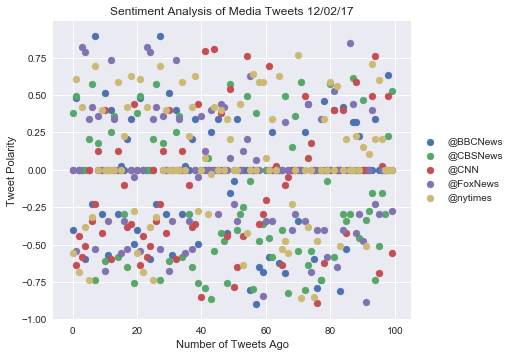

In [5]:
#create plots
x = np.arange(len(compound_score_df.index))
legend_list = []
fig = plt.figure()
ax = plt.subplot(111)
for news_organization in target_users:
    legend_list.append(ax.scatter(x=x,y=compound_score_df[news_organization],label=news_organization))
plt.legend(legend_list,target_users)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets 12/02/17')
plt.savefig('tweet_polarity_vs_tweet_num.png')
plt.show()

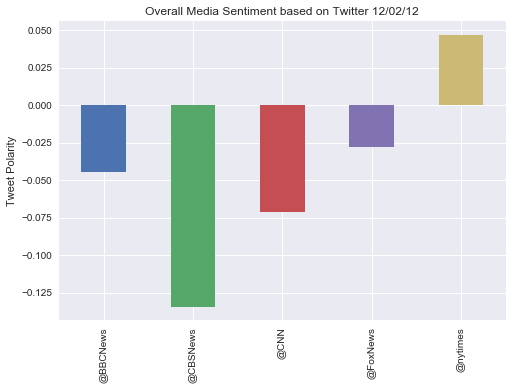

In [6]:
x = np.arange(len(sentiment_df.index))
sentiment_df["Compound"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(sentiment_df["Organization"]))
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Twitter 12/02/12')
plt.savefig('tweet_polarity_average.png')
plt.show()

## Observable Trends

1) The New York Times is the only outlet with a positive mean tweet polarity.
2) The mean tweet polarity for CBS News is more than twice as negative as any of the other news outlets.
3) The mean tweet polarity for Fox News has the smallest absolute value and thus is the "least polarized" of the news outlets analyzed.